## Justin Sandbox

In [2]:
# Import linraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 


In [3]:
conn = sqlite3.connect('../data/im.db')

In [4]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
df_dirs = pd.read_sql("""
 SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
""", conn)

In [6]:
df_imdb = pd.read_sql("""
    SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
        LEFT JOIN persons AS ps
            ON dr.person_id = ps.person_id
""", conn)

In [7]:
df_dirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   movie_id         140417 non-null  object 
 7   person_id        140417 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.9+ MB


In [8]:
df_dirs.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,nm0002411
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,nm0000080
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,nm0611531
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,nm0765384


In [9]:
df_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,nm0000080,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,nm0765384,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN,tt9916538,nm8185151,nm8185151,Azhar Kinoi Lubis,NaN,NaN,director
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN,tt9916622,nm9272490,nm9272490,Angela Gurgel,NaN,NaN,"director,writer"
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN,tt9916706,nm7764440,nm7764440,Kanchan Nayak,NaN,NaN,director
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN,tt9916730,nm10538612,nm10538612,Kiran Gawade,NaN,NaN,None


In [10]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            146144 non-null  object 
 1   primary_title       146144 non-null  object 
 2   original_title      146123 non-null  object 
 3   start_year          146144 non-null  int64  
 4   runtime_minutes     114405 non-null  float64
 5   genres              140736 non-null  object 
 6   movie_id            73856 non-null   object 
 7   averagerating       73856 non-null   float64
 8   numvotes            73856 non-null   float64
 9   movie_id            140417 non-null  object 
 10  person_id           140417 non-null  object 
 11  person_id           140416 non-null  object 
 12  primary_name        140416 non-null  object 
 13  birth_year          30609 non-null   float64
 14  death_year          856 non-null     float64
 15  primary_profession  139887 non-nul

In [11]:
df_imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year
count,146144.000000,114405.000000,73856.000000,7.385600e+04,30609.000000,856.000000
mean,2014.621798,86.187247,6.332729,3.523662e+03,1968.353523,2014.358645
std,2.733583,166.360590,1.474978,3.029402e+04,13.153472,7.049441
min,2010.000000,1.000000,1.000000,5.000000e+00,1878.000000,1929.000000
25%,2012.000000,70.000000,5.500000,1.400000e+01,1960.000000,2013.000000
50%,2015.000000,87.000000,6.500000,4.900000e+01,1970.000000,2016.000000
75%,2017.000000,99.000000,7.400000,2.820000e+02,1978.000000,2017.000000
max,2115.000000,51420.000000,10.000000,1.841066e+06,2004.000000,2019.000000


In [12]:
df_imdb.sort_values('runtime_minutes', ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession
132389,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,tt8273150,5.0,17.0,tt8273150,nm9769428,nm9769428,Daniel Andersson,NaN,NaN,"director,editor"
44840,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,tt2659636,6.2,69.0,tt2659636,nm5492599,nm5492599,Bjornstjerne Reuter Christiansen,NaN,NaN,director
123467,tt7492094,Nari,Nari,2017,6017.0,Documentary,None,NaN,NaN,tt7492094,nm9335306,nm9335306,Chai Dingari,NaN,NaN,director
87264,tt5068890,Hunger!,Hunger!,2015,6000.0,"Documentary,Drama",None,NaN,NaN,tt5068890,nm7617940,nm7617940,Luca Pesante,NaN,NaN,director
88717,tt5136218,London EC1,London EC1,2015,5460.0,"Comedy,Drama,Mystery",None,NaN,NaN,tt5136218,nm6660605,nm6660605,Erdogan Gilgil,NaN,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family,None,NaN,NaN,tt9915790,nm10538030,nm10538030,Sudipa Chatterjee,NaN,NaN,None
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",None,NaN,NaN,tt9916428,nm0910951,nm0910951,Jixing Wang,NaN,NaN,"director,writer"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN,tt9916622,nm9272490,nm9272490,Angela Gurgel,NaN,NaN,"director,writer"
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN,tt9916706,nm7764440,nm7764440,Kanchan Nayak,NaN,NaN,director


In [13]:
df_imdb.head(50)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,nm0000080,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,nm0765384,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,None,NaN,NaN,tt0111414,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32.0,tt0112502,nm6883878,nm6883878,Mc Jones,NaN,NaN,"actor,director"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263.0,tt0137204,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",None,NaN,NaN,tt0139613,nm0518037,nm0518037,António Loja Neves,1953.0,2018.0,"actor,director,producer"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,None,NaN,NaN,tt0144449,nm0309428,nm0309428,Louis van Gasteren,1922.0,2016.0,"director,writer,producer"


In [14]:
df_imdb[['Genre_1','Genre_2', 'Genre_3']]=df_imdb["genres"].str.split(",",expand=True)

In [15]:
df_imdb['rating_relative_to_avg'] = df_imdb['averagerating'] - df_imdb['averagerating'].mean()

In [16]:
df_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",Action,Crime,Drama,0.667271
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor",Biography,Drama,None,0.867271
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,nm0000080,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer",Drama,None,None,0.567271
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer",Comedy,Drama,None,-0.232729
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,nm0765384,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",Comedy,Drama,Fantasy,0.167271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN,tt9916538,nm8185151,nm8185151,Azhar Kinoi Lubis,NaN,NaN,director,Drama,None,None,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN,tt9916622,nm9272490,nm9272490,Angela Gurgel,NaN,NaN,"director,writer",Documentary,None,None,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN,tt9916706,nm7764440,nm7764440,Kanchan Nayak,NaN,NaN,director,Comedy,None,None,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN,tt9916730,nm10538612,nm10538612,Kiran Gawade,NaN,NaN,None,None,None,None,NaN


In [17]:
df_gen_cnt = df_imdb[['Genre_1', 'Genre_2', 'Genre_3']].apply(pd.Series.value_counts)

In [18]:
df_gen_cnt = df_gen_cnt.fillna(0)

In [19]:
df_gen_cnt['total_gen_cnt'] = df_gen_cnt['Genre_1'] + df_gen_cnt['Genre_2'] + df_gen_cnt['Genre_3']

In [20]:
df_genres = df_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

In [21]:
df_genres = df_genres.dropna(subset=['averagerating'])

In [22]:
df_genres.head()

,Genre_1,Genre_2,Genre_3,averagerating,numvotes,start_year
0,Action,Crime,Drama,7.0,77.0,2013
1,Biography,Drama,None,7.2,43.0,2019
2,Drama,None,None,6.9,4517.0,2018
3,Comedy,Drama,None,6.1,13.0,2018
4,Comedy,Drama,Fantasy,6.5,119.0,2017


In [23]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre_1        73052 non-null  object 
 1   Genre_2        36860 non-null  object 
 2   Genre_3        18578 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  float64
 5   start_year     73856 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [26]:
len(lst_genres)

NameError: name 'lst_genres' is not defined

In [27]:
test = []

# for gen in lst_genres:
#     rating_sum = 0
#     rating_count = 1
#     for movie in df_genres:
#         if gen in movie:
#             rating_sum = rating_sum + df_genres['averagerating']
#             rating_count += 1
#     avg_gen_rating = rating_sum / rating_count
#     test.append(avg_gen_rating)

tl = []
for gen in lst_genres:
    ratings=[]
    ratings.append(gen)
    for mov in enumerate(df_genres):
        if "Action" in mov['Genre_1']:
            ratings.append(mov['averagerating'])
    tl.append(ratings)

tl



NameError: name 'lst_genres' is not defined

In [28]:


df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)

df_top10_gen_comb_rat = df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)[:10]
df_top10_gen_comb_rat

averagerating   numvotes  start_year
Genre_1   Genre_2   Genre_3                                       
Action    Drama     War               8.450  241280.50     2015.00
Animation Drama     Fantasy           8.400  134084.00     2016.00
Adventure Drama     Sci-Fi            8.300  989725.00     2014.50
Comedy    Drama     Thriller          8.100  151123.00     2014.00
                    Fantasy           8.000  200574.00     2013.50
Biography Drama     Music             8.000  345466.00     2018.00
Action    Biography Drama             7.850  291407.75     2014.00
Drama     Music     Romance           7.800  249245.00     2018.00
          Mystery   Sci-Fi            7.775  385403.75     2015.25
Biography Drama     Thriller          7.700  415517.00     2013.75

In [29]:
lst_genres = list(df_gen_cnt.index)
lst_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [30]:
df_gen_cnt

,Genre_1,Genre_2,Genre_3,total_gen_cnt
Action,10335,0.0,0.0,10335.0
Adult,23,2.0,0.0,25.0
Adventure,4760,1705.0,0.0,6465.0
Animation,1839,763.0,197.0,2799.0
Biography,8021,656.0,45.0,8722.0
Comedy,21514,3092.0,706.0,25312.0
Crime,3919,2369.0,465.0,6753.0
Documentary,41609,8737.0,1294.0,51640.0
Drama,31343,14559.0,3981.0,49883.0
Family,1108,2980.0,2139.0,6227.0


In [31]:
df_gen_cnt.sort_values('total_gen_cnt', ascending=False)
top10_gen_cnt = df_gen_cnt.sort_values('total_gen_cnt', ascending=False)[0:10]

<BarContainer object of 10 artists>

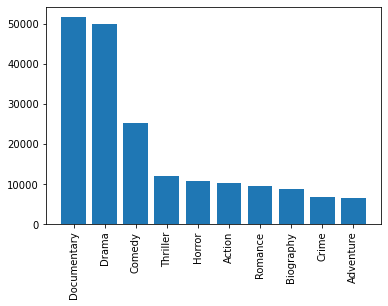

In [32]:
fig, ax = plt.subplots()

x = top10_gen_cnt.index
y = top10_gen_cnt['total_gen_cnt']

plt.xticks(rotation=90)

ax.bar(x,y)

In [33]:
#Top 50 movies by rating with at least 100,000 votes and released no later than 2012
df_top50_rat = df_imdb[(df_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)].sort_values('averagerating', ascending=False)[0:50]

In [34]:
df_top50_rat

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",tt5813916,9.3,100568.0,tt5813916,nm3809021,nm3809021,Alper Caglar,NaN,NaN,"producer,writer,editor",Action,Drama,War,2.967271
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",tt4154796,8.8,441135.0,tt4154796,nm0751577,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",Action,Adventure,Sci-Fi,2.467271
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334.0,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",Adventure,Drama,Sci-Fi,2.267271
43376,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916.0,tt2582802,nm3227090,nm3227090,Damien Chazelle,1985.0,NaN,"producer,writer,director",Drama,Music,None,2.167271
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",tt4154756,8.5,670926.0,tt4154756,nm0751577,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer",Action,Adventure,Sci-Fi,2.167271
87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",tt5074352,8.5,123638.0,tt5074352,nm4318159,nm4318159,Nitesh Tiwari,NaN,NaN,"writer,director,music_department",Action,Biography,Drama,2.167271
80655,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",tt4633694,8.5,210869.0,tt4633694,nm0745247,nm0745247,Rodney Rothman,NaN,NaN,"writer,producer,director",Action,Adventure,Animation,2.167271
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769.0,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director",Action,Thriller,None,2.067271
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405.0,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer",Drama,Western,None,2.067271
38424,tt2380307,Coco,Coco,2017,105.0,"Adventure,Animation,Comedy",tt2380307,8.4,277194.0,tt2380307,nm0881279,nm0881279,Lee Unkrich,1967.0,NaN,"editorial_department,editor,miscellaneous",Adventure,Animation,Comedy,2.067271


In [35]:
df_top10_rat = df_top50_rat[0:10]

<ipython-input-36-bf6992674d5c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, rotation=80)
<ipython-input-36-bf6992674d5c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2, rotation=80)


<BarContainer object of 10 artists>

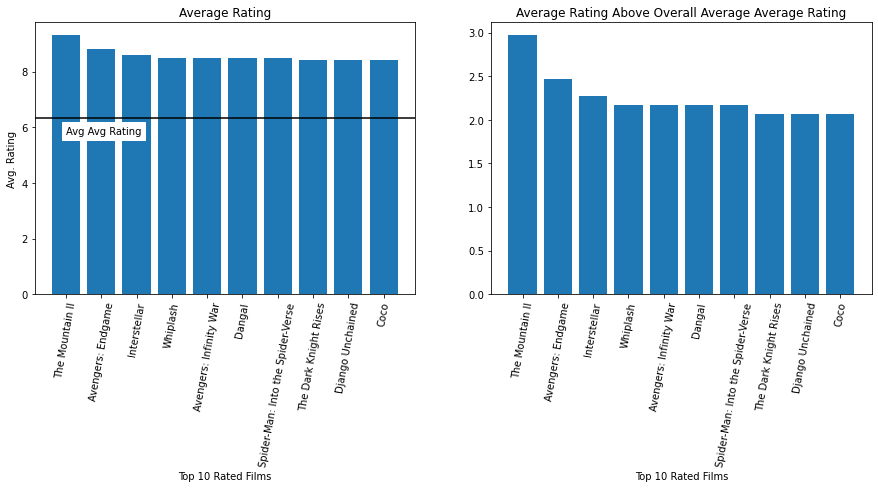

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_top10_rat['primary_title']
y1 = df_top10_rat['averagerating']

x2 = df_top10_rat['primary_title']
y2 = df_top10_rat['rating_relative_to_avg']

ax1.axhline(6.332729, c="black")
ax1.text(0,5.75,"Avg Avg Rating", backgroundcolor="White")

ax1.set_xticklabels(x1, rotation=80)
ax2.set_xticklabels(x2, rotation=80)

ax1.set_xlabel("Top 10 Rated Films")
ax1.set_ylabel("Avg. Rating")

ax2.set_xlabel("Top 10 Rated Films")
ax.set_ylabel("Avg. Rating Above Avg. Avg. Rating")

ax1.set_title("Average Rating")
ax2.set_title("Average Rating Above Overall Average Average Rating")

ax1.bar(x1,y1)
ax2.bar(x2,y2)

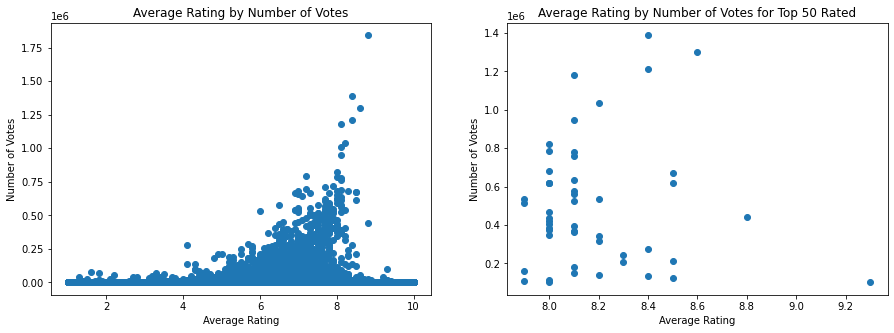

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_imdb['averagerating']
y1 = df_imdb['numvotes']

x2 = df_top50_rat['averagerating']
y2 = df_top50_rat['numvotes']


ax1.set_xlabel("Average Rating")
ax1.set_ylabel("Number of Votes")
ax1.set_title("Average Rating by Number of Votes")

ax2.set_xlabel("Average Rating")
ax2.set_ylabel("Number of Votes")
ax2.set_title("Average Rating by Number of Votes for Top 50 Rated")

ax1.scatter(x1,y1)
ax2.scatter(x2,y2)

In [38]:
df_im_run_noout = df_imdb[df_imdb['runtime_minutes'] < 1000 ]

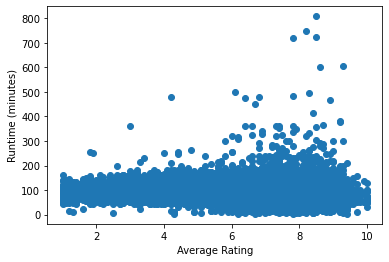

In [39]:
fig, ax = plt.subplots()

x = df_im_run_noout['averagerating']
y = df_im_run_noout['runtime_minutes']

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime (minutes)")

ax.scatter(x,y)

In [40]:
dir_mul_top50 = df_top50_rat.value_counts('primary_name')[0:7]


type(dir_mul_top50)

pandas.core.series.Series

In [41]:
df_top50_rat[df_top50_rat['primary_name'] == 'Denis Villeneuve']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
7215,tt1392214,Prisoners,Prisoners,2013,153.0,"Crime,Drama,Mystery",tt1392214,8.1,526273.0,tt1392214,nm0898288,nm0898288,Denis Villeneuve,1967.0,NaN,"director,writer,editor",Crime,Drama,Mystery,1.767271
20468,tt1856101,Blade Runner 2049,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi",tt1856101,8.0,376241.0,tt1856101,nm0898288,nm0898288,Denis Villeneuve,1967.0,NaN,"director,writer,editor",Drama,Mystery,Sci-Fi,1.667271
42473,tt2543164,Arrival,Arrival,2016,116.0,"Drama,Mystery,Sci-Fi",tt2543164,7.9,515483.0,tt2543164,nm0898288,nm0898288,Denis Villeneuve,1967.0,NaN,"director,writer,editor",Drama,Mystery,Sci-Fi,1.567271


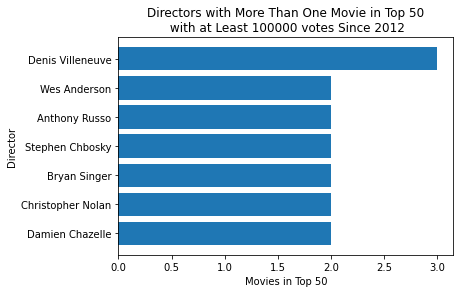

In [43]:
fig, ax = plt.subplots()

x = dir_mul_top50.index
y = dir_mul_top50.values

ax.set_xlabel('Movies in Top 50')
ax.set_ylabel('Director')
ax.set_title('Directors with More Than One Movie in Top 50\n with at Least 100000 votes Since 2012')

ax.barh(x,y)
plt.gca().invert_yaxis()

fig.savefig('../images/dirs_top_top_50.png')